# Image Augmentation

Image Augmentation augments datasets (especially small datasets) to train model. The way to do image augmentation is to transform images by different ways. In this notebook we demonstrate how to do image augmentation using Analytics ZOO APIs. 

In [1]:
from bigdl.dllib.nncontext import init_nncontext
from bigdl.dllib.feature.image import *
import cv2
import numpy as np
from IPython.display import Image, display
sc = init_nncontext("Image Augmentation Example")

Prepending /home/ding/anaconda3/envs/conda_py36/lib/python3.6/site-packages/bigdl/share/dllib/conf/spark-bigdl.conf to sys.path
pyspark_submit_args is:  --driver-class-path /home/ding/anaconda3/envs/conda_py36/lib/python3.6/site-packages/bigdl/share/dllib/lib/bigdl-dllib-0.14.0-SNAPSHOT-jar-with-dependencies.jar pyspark-shell 


## Create LocalImageSet

In [2]:
# create LocalImageSet from an image
local_image_set = ImageSet.read("image/test.jpg")

# create LocalImageSet from an image folder
local_image_set = ImageSet.read("image/")

# create LocalImageSet from list of images
image = cv2.imread("image/test.jpg")
local_image_set = LocalImageSet([image])

print(local_image_set.get_image())
print('isDistributed: ', local_image_set.is_distributed(), ', isLocal: ', local_image_set.is_local())

creating: createLocalImageSet
[array([[[ 33.,  32.,  34., ...,  79.,  79.,  80.],
        [ 33.,  32.,  34., ...,  78.,  79.,  82.],
        [ 34.,  33.,  34., ...,  78.,  78.,  81.],
        ...,
        [ 82.,  47.,  42., ...,  42.,  42.,  42.],
        [100.,  58.,  46., ...,  43.,  43.,  43.],
        [112.,  64.,  48., ...,  41.,  41.,  42.]],

       [[ 56.,  55.,  57., ..., 102.,  99., 100.],
        [ 56.,  55.,  57., ..., 101.,  99., 102.],
        [ 57.,  56.,  57., ..., 100.,  98., 101.],
        ...,
        [114.,  79.,  74., ...,  75.,  75.,  75.],
        [133.,  90.,  77., ...,  76.,  76.,  76.],
        [143.,  97.,  79., ...,  74.,  74.,  75.]],

       [[ 94.,  93.,  95., ..., 118., 117., 118.],
        [ 94.,  93.,  95., ..., 117., 117., 120.],
        [ 95.,  94.,  95., ..., 118., 116., 119.],
        ...,
        [133.,  98.,  97., ..., 108., 108., 108.],
        [149., 109., 100., ..., 109., 109., 109.],
        [158., 113., 100., ..., 107., 107., 108.]]], dtype=

## Create DistributedImageSet

In [3]:
# create DistributedImageSet from an image
distributed_image_set = ImageSet.read("image/test.jpg", sc, 2)

# create DistributedImageSet from an image folder
distributed_image_set = ImageSet.read("image/", sc, 2)

# create LocalImageSet from image rdd
image = cv2.imread("image/test.jpg")
image_rdd = sc.parallelize([image], 2)
label_rdd = sc.parallelize([np.array([1.0])], 2)
distributed_image_set = DistributedImageSet(image_rdd, label_rdd)

images_rdd = distributed_image_set.get_image()
label_rdd = distributed_image_set.get_label()
print(images_rdd)
print(label_rdd)
print('isDistributed: ', distributed_image_set.is_distributed(), ', isLocal: ', distributed_image_set.is_local())
print('total images:', images_rdd.count())

creating: createDistributedImageSet
PythonRDD[20] at RDD at PythonRDD.scala:53
PythonRDD[21] at RDD at PythonRDD.scala:53
isDistributed:  True , isLocal:  False
total images: 1


## Transform images

In [4]:
path = "image/test.jpg"
    
def transform_display(transformer, image_set):
    out = transformer(image_set)
    cv2.imwrite('/tmp/tmp.jpg', out.get_image(to_chw=False)[0])
    display(Image(filename='/tmp/tmp.jpg'))

### Brightness
Adjust the image brightness

creating: createImageBrightness


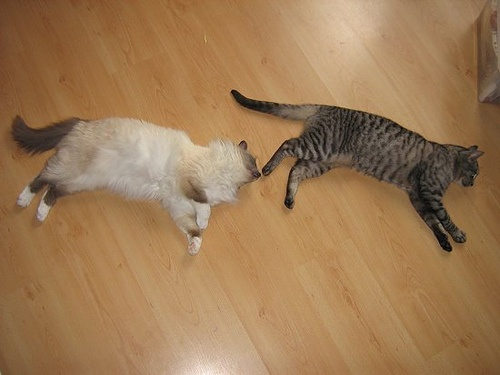

In [5]:
brightness = ImageBrightness(0.0, 32.0)
image_set = ImageSet.read(path)
transform_display(brightness, image_set)

### Hue
Adjust image hue

creating: createImageHue


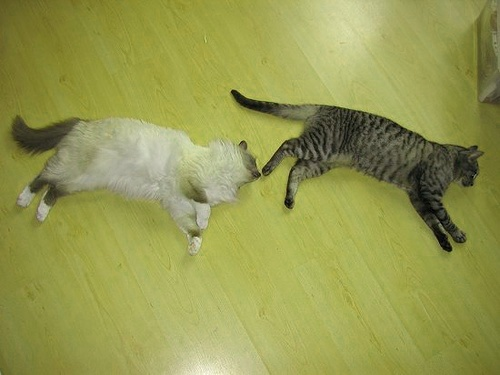

In [6]:
transformer = ImageHue(-18.0, 18.0)
image_set = ImageSet.read(path)
transform_display(transformer, image_set)

### Saturation
Adjust image saturation

creating: createImageSaturation


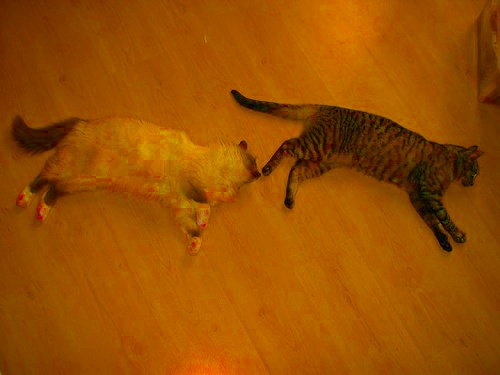

In [7]:
transformer = ImageSaturation(10.0, 20.0)
image_set= ImageSet.read(path)
transform_display(transformer, image_set)

### ChannelOrder
Random change the channel of an image

creating: createImageChannelOrder


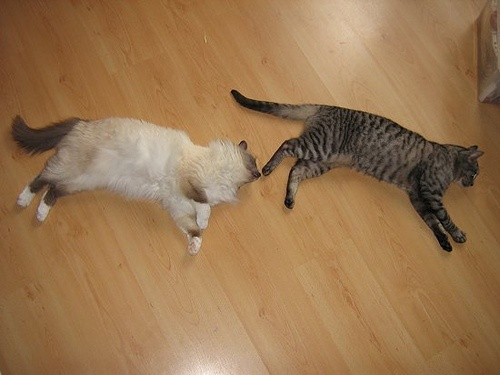

In [8]:
transformer = ImageChannelOrder()
image_set = ImageSet.read(path)
transform_display(transformer, image_set)

### ColorJitter
Random adjust brightness, contrast, hue, saturation

creating: createImageColorJitter


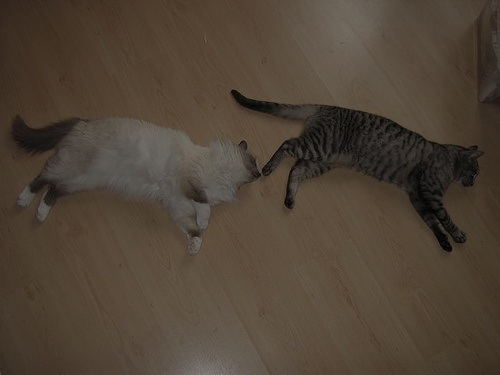

In [9]:
transformer = ImageColorJitter()
image_set = ImageSet.read(path)
transform_display(transformer, image_set)

### Resize
Resize the roi(region of interest) according to scale

creating: createImageResize


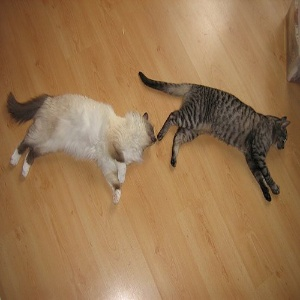

In [10]:
transformer = ImageResize(300, 300)
image_set = ImageSet.read(path)
transform_display(transformer, image_set)

### AspectScale
Resize the image, keep the aspect ratio. scale according to the short edge

creating: createImageAspectScale


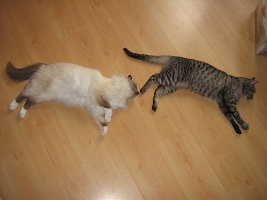

In [11]:
transformer = ImageAspectScale(200, max_size = 3000)
image_set = ImageSet.read(path)
transform_display(transformer, image_set)

### RandomAspectScale
Resize the image by randomly choosing a scale

creating: createImageRandomAspectScale


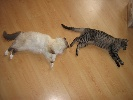

In [12]:
transformer = ImageRandomAspectScale([100, 300], max_size = 3000)
image_set = ImageSet.read(path)
transform_display(transformer, image_set)

### ChannelNormalize
Image channel normalize

creating: createImageChannelNormalize


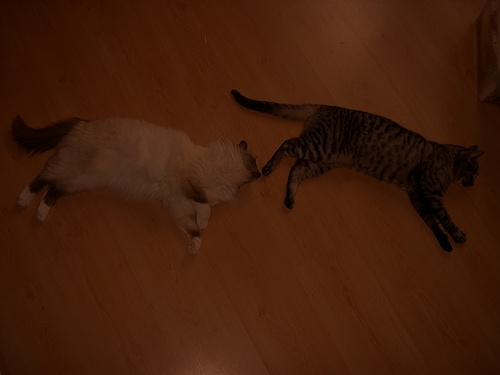

In [13]:
transformer = ImageChannelNormalize(20.0, 30.0, 40.0, 2.0, 3.0, 4.0)
image_set = ImageSet.read(path)
transform_display(transformer, image_set)

### PixelNormalize
Pixel level normalizer, data(Pixel) = data(Pixel) - mean(Pixels)

PixelNormalize takes nearly one and a half minutes. Please wait a moment.
creating: createImagePixelNormalize


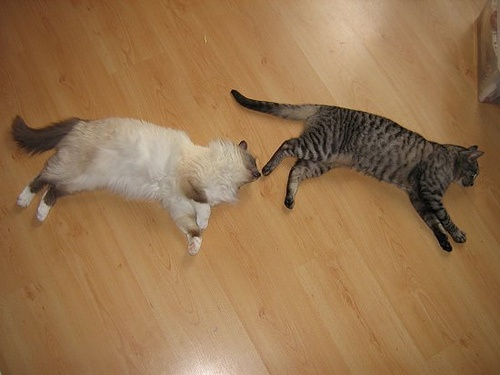

CPU times: user 30.9 s, sys: 4.27 s, total: 35.2 s
Wall time: 36.8 s


In [14]:
%%time
print("PixelNormalize takes nearly one and a half minutes. Please wait a moment.")
means = [2.0] * 3 * 500 * 375
transformer = ImagePixelNormalize(means)
image_set = ImageSet.read(path)
transform_display(transformer, image_set)

### CenterCrop
Crop a `cropWidth` x `cropHeight` patch from center of image.

creating: createImageCenterCrop


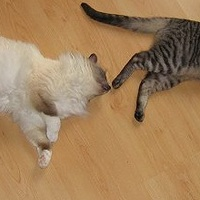

In [15]:
transformer = ImageCenterCrop(200, 200)
image_set = ImageSet.read(path)
transform_display(transformer, image_set)

### RandomCrop
Random crop a `cropWidth` x `cropHeight` patch from an image.

creating: createImageRandomCrop


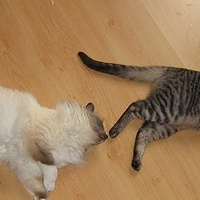

In [16]:
transformer = ImageRandomCrop(200, 200)
image_set = ImageSet.read(path)
transform_display(transformer, image_set)

### FixedCrop
Crop a fixed area of image

creating: createImageFixedCrop


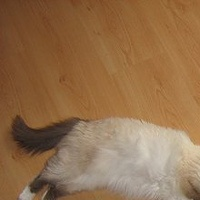

In [17]:
transformer = ImageFixedCrop(0.0, 0.0, 200.0, 200.0, False)
image_set = ImageSet.read(path)
transform_display(transformer, image_set)

### Filler
Fill part of image with certain pixel value

creating: createImageFiller


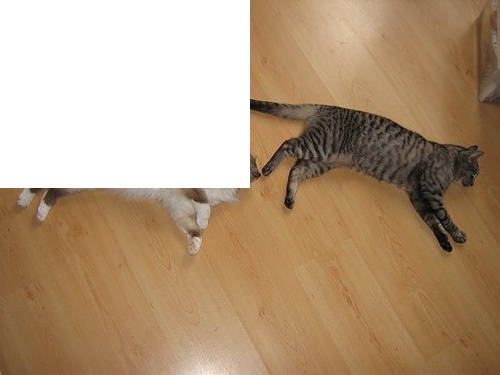

In [18]:
transformer = ImageFiller(0.0, 0.0, 0.5, 0.5, 255)
image_set = ImageSet.read(path)
transform_display(transformer, image_set)

### Expand
Expand image, fill the blank part with the meanR, meanG, meanB

creating: createImageExpand


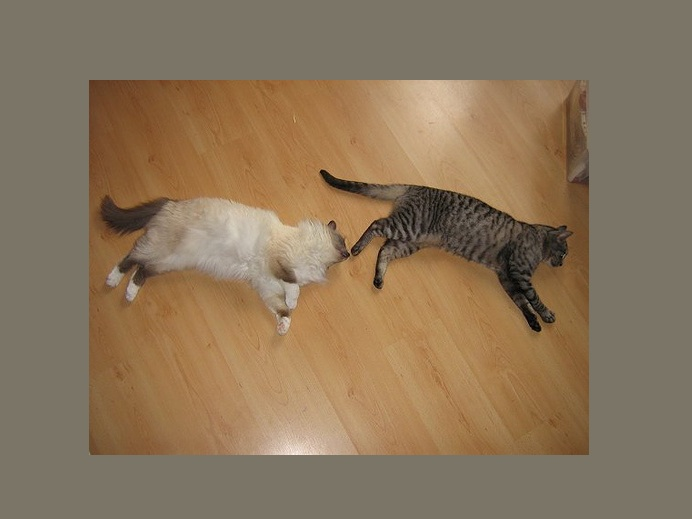

In [19]:
transformer = ImageExpand(means_r=123, means_g=117, means_b=104,
                        max_expand_ratio=2.0)
image_set = ImageSet.read(path)
transform_display(transformer, image_set)

### HFlip
Flip the image horizontally

creating: createImageHFlip


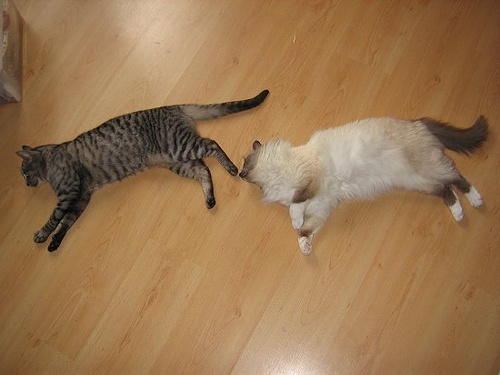

In [20]:
transformer = ImageHFlip()
image_set = ImageSet.read(path)
transform_display(transformer, image_set)